This jupyter notebook serves to reproduce all of the figures published in "Cell-free and in vivo characterization of LuxR, LasR, and RpaR activation systems" by Halleran and Murray, 2017. 

All analysis is performed in Python 3.5 using Anaconda. 

All data can be found in the Data directory of this git repository. 

In [3]:
#First we are going to import all of the packages we need for the entirety of the notebook. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# This sets default backgrounds for our seaborn plots to make them look a bit nicer. 
rcParams.update({'figure.autolayout': True})
rc={'lines.linewidth': 4, 'axes.labelsize': 24, 'axes.titlesize': 24}

First we want to recreate figure 1, part A through D. 

Figure 1A is a time trace off a BioTek H1M. The data for this file is in /Data/(RpaR link here). 

Below we are going to write a function for taking a series of wells and plotting a linegraph with standard deviation. Then we are going to pass in all of our wells from the figure and create a formatted plot at the end. 

## Figure 1A 

In [4]:
def plotWells(wells, gain, tag, color):
	allWells = []
	for well in wells: 
		wellData = flxData[flxData['Well'] == well]
		wellData = wellData[wellData['Gain'] == gain]
		time = wellData.loc[:, 'Time (hr)']
		allWells.append(wellData.uM)

	wellArray = (allWells[0], allWells[1], allWells[2], allWells[3])
	mean = np.mean(wellArray, axis=0)
	std = np.std(wellArray, axis=0)
	below_mean = np.subtract(mean, std)
	above_mean = np.add(mean, std)
	plt.fill_between(time, below_mean, above_mean, alpha=0.4, color=color)
	plt.plot(time, mean, color=color, label=tag)

Now we are going to load in our fluorescence data from the BioTek. We are using already tidy format data, for a package to tidy raw data please see github.com/sclamons/murraylab_tools 

In [6]:
flxData = pd.read_csv('Data/170529_RpaR_CT_Trial_tidy.csv')

In [7]:
flxData

Channel  Gain  Time (sec)  Time (hr) Well  AFU        uM  Excitation  \
0          GFP    61           0   0.000000   A1   16  0.014153         485   
1          GFP    61           0   0.000000   A2   24  0.021230         485   
2          GFP    61           0   0.000000   A3    6  0.005307         485   
3          GFP    61           0   0.000000   A4    9  0.007961         485   
4          GFP    61           0   0.000000   A5   10  0.008846         485   
5          GFP    61           0   0.000000   A6    6  0.005307         485   
6          GFP    61           0   0.000000   A7    9  0.007961         485   
7          GFP    61           0   0.000000   A8   10  0.008846         485   
8          GFP    61           0   0.000000   A9    9  0.007961         485   
9          GFP    61           0   0.000000  A10    8  0.007077         485   
10         GFP    61           0   0.000000  A11   10  0.008846         485   
11         GFP    61           0   0.000000  A12    7  0.006192         485   
12         GFP    61           0   0.000000  A13   10  0.008846         485   
13         GFP    61           0   0.000000  A14   11  0.009730         485   
14         GFP    61           0   0.000000  A15    8  0.007077         485   
15         GFP    61           0   0.000000  A16   11  0.009730         485   
16         GFP    61           0   0.000000  A17   12  0.010615         485   
17         GFP    61           0   0.000000  A18    7  0.006192         485   
18         GFP    61           0   0.000000  A19    9  0.007961         485   
19         GFP    61           0   0.000000  A20   10  0.008846         485   
20         GFP    61           0   0.000000  A21    9  0.007961         485   
21         GFP    61           0   0.000000  A22    7  0.006192         485   
22         GFP    61           0   0.000000  A23    5  0.004423         485   
23         GFP    61           0   0.000000  A24    3  0.002654         485   
24         GFP    61           0   0.000000   B1    6  0.005307         485   
25         GFP    61           0   0.000000   B2    9  0.007961         485   
26         GFP    61           0   0.000000   B3    0  0.000000         485   
27         GFP    61           0   0.000000   B4    4  0.003538         485   
28         GFP    61           0   0.000000   B5    5  0.004423         485   
29         GFP    61           0   0.000000   B6   10  0.008846         485   
...        ...   ...         ...        ...  ...  ...       ...         ...   
152034     GFP   100       71889  19.969167  O19  152  0.003760         485   
152035     GFP   100       71889  19.969167  O20  155  0.003834         485   
152036     GFP   100       71889  19.969167  O21  125  0.003092         485   
152037     GFP   100       71889  19.969167  O22  152  0.003760         485   
152038     GFP   100       71889  19.969167  O23  141  0.003488         485   
152039     GFP   100       71889  19.969167  O24  155  0.003834         485   
152040     GFP   100       71889  19.969167   P1  748  0.018503         485   
152041     GFP   100       71889  19.969167   P2  698  0.017267         485   
152042     GFP   100       71889  19.969167   P3  971  0.024020         485   
152043     GFP   100       71889  19.969167   P4  719  0.017786         485   
152044     GFP   100       71889  19.969167   P5  924  0.022857         485   
152045     GFP   100       71889  19.969167   P6  994  0.024589         485   
152046     GFP   100       71889  19.969167   P7  982  0.024292         485   
152047     GFP   100       71889  19.969167   P8  719  0.017786         485   
152048     GFP   100       71889  19.969167   P9  726  0.017959         485   
152049     GFP   100       71889  19.969167  P10  892  0.022066         485   
152050     GFP   100       71889  19.969167  P11  899  0.022239         485   
152051     GFP   100       71889  19.969167  P12  752  0.018602         485   
152052     GFP   100       71889  19.969167  P13  144  0.

For this plot we want to plot RpaR with pRpa with different concentrations of Rpa ligand (p-coumaroyl). Those wells are: 
I-P, 9-12. Each row is a different amount of AHL, each column is a replicate experiment. I is the negative control (DMSO only), and then we go from high concentraiton (100uM) in J to low concentration in P. 

Let's plot that out. 

/Users/andrewhalleran/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


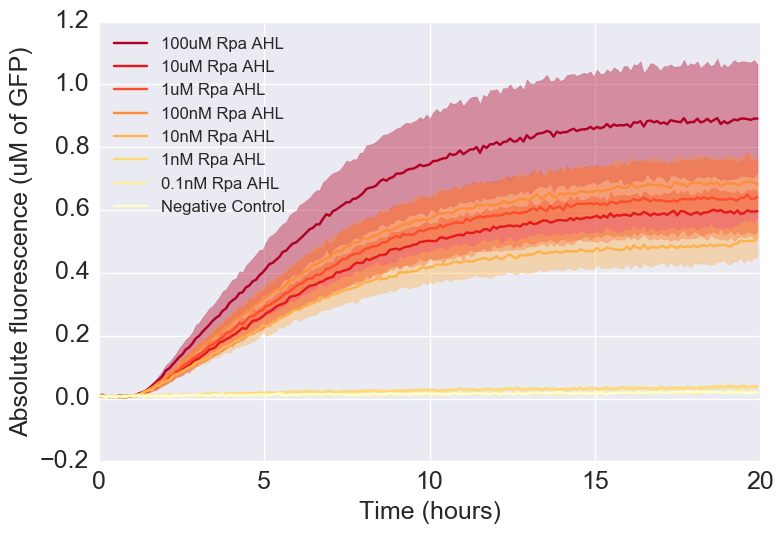

In [21]:
# Identify the wells we want to plot 
well1 = '9'
well2 = '10'
well3 = '11'
well4 = '12'

# Tell the plotting script what AHL we are using

AHL = 'Rpa'

# Call the plotWells function
plotWells(['J' + well1, 'J' + well2, 'J' + well3, 'J' + well4], 61, '100uM ' + AHL + ' AHL', '#b10026')
plotWells(['K' + well1, 'K' + well2, 'K' + well3, 'K' + well4], 61, '10uM ' + AHL + ' AHL', '#e31a1c')
plotWells(['L' + well1, 'L' + well2, 'L' + well3, 'L' + well4], 61, '1uM ' + AHL + ' AHL', '#fc4e2a')
plotWells(['M' + well1, 'M' + well2, 'M' + well3, 'M' + well4], 61, '100nM ' + AHL +  ' AHL', '#fd8d3c')
plotWells(['N' + well1, 'N' + well2, 'N' + well3, 'N' + well4], 61, '10nM ' + AHL +  ' AHL', '#feb24c')
plotWells(['O' + well1, 'O' + well2, 'O' + well3, 'O' + well4], 61, '1nM ' + AHL +  ' AHL', '#fed976')
plotWells(['P' + well1, 'P' + well2, 'P' + well3, 'P' + well4], 61, '0.1nM ' + AHL +  ' AHL', '#ffeda0')
plotWells(['I' + well1, 'I' + well2, 'I' + well3, 'I' + well4], 61, 'Negative Control', '#ffffcc')

# Time to format the plot to make it a little bit cleaner
plt.xlabel('Time (hours)', fontsize=18)
plt.ylabel('Absolute fluorescence (uM of GFP)', fontsize=18)
plt.legend(loc='upper left', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()